In [ ]:
!pip install PyPDF2
import pandas as pd
import PyPDF2
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.4 MB/s eta 0:00:00


In [ ]:
# Read raw dataset from git hub
url = 'https://raw.githubusercontent.com/MaxElgart/CSCI-461/main/2022_Data.csv'
df_all = pd.read_csv(url)
df_all.head()

,YEAR,SERIAL,QUARTER,STRATA,PSU,NHISHID,INTERVWQTR,ONEFAMFLAG,HHADULTS,HHKIDS,...,CVDDIAG,CVDTESTRSLT,CVDSYMP,VIRAPP12M,CVDSHT,CVDSHTNUM,CVDMODOSE1,CVDYRDOSE1,CVDMODOSE2,CVDYRDOSE2
0,2022,1,4,143,16,0002022H000001,4,2,2,0,...,2,2,3,2,1,0,0,0,0,0
1,2022,2,3,106,53,0002022H000003,3,2,2,2,...,2,2,3,1,2,3,3,2022,6,2021
2,2022,2,3,106,53,0002022H000003,3,2,2,2,...,1,1,0,1,2,2,6,2021,4,2021
3,2022,3,4,134,13,0002022H000006,4,2,1,0,...,2,2,3,1,2,1,3,2022,0,0
4,2022,4,1,106,53,0002022H000007,1,2,2,1,...,1,1,0,1,2,3,11,2021,4,2021


In [ ]:
# Explore shape of the whole dataframe
df_all.shape

(35115, 624)

In [ ]:
# No null values in dataframe
df_all.loc[df_all.isnull().any(axis = 1)]

,YEAR,SERIAL,QUARTER,STRATA,PSU,NHISHID,INTERVWQTR,ONEFAMFLAG,HHADULTS,HHKIDS,...,CVDDIAG,CVDTESTRSLT,CVDSYMP,VIRAPP12M,CVDSHT,CVDSHTNUM,CVDMODOSE1,CVDYRDOSE1,CVDMODOSE2,CVDYRDOSE2


In [ ]:
# Value counts for Ever told had coronary heart disease: 1 = No; 0 = NIU; 2 = Yes; 9 = Unknown--don't know; 7 = Unknown--refused
df_all.CHEARTDIEV.value_counts()

1    25845
0     7464
2     1726
9       54
7       26
Name: CHEARTDIEV, dtype: int64

In [ ]:
# As we can see every value that is NIU are kids so we will drop all kids from dataframe
df_all.loc[df_all.CHEARTDIEV == 0, "CSTATFLG"].value_counts()

1    7464
Name: CSTATFLG, dtype: int64

In [ ]:
# See how many kids there are (1 means they are a kid)
df_all.CSTATFLG.value_counts()

0    27651
1     7464
Name: CSTATFLG, dtype: int64

In [ ]:
# Create dataframe of only adults since childeren are marked as NIU for heart disease
df_adults = df_all.loc[df_all.CSTATFLG != 1]
df_adults.head()

,YEAR,SERIAL,QUARTER,STRATA,PSU,NHISHID,INTERVWQTR,ONEFAMFLAG,HHADULTS,HHKIDS,...,CVDDIAG,CVDTESTRSLT,CVDSYMP,VIRAPP12M,CVDSHT,CVDSHTNUM,CVDMODOSE1,CVDYRDOSE1,CVDMODOSE2,CVDYRDOSE2
0,2022,1,4,143,16,0002022H000001,4,2,2,0,...,2,2,3,2,1,0,0,0,0,0
1,2022,2,3,106,53,0002022H000003,3,2,2,2,...,2,2,3,1,2,3,3,2022,6,2021
3,2022,3,4,134,13,0002022H000006,4,2,1,0,...,2,2,3,1,2,1,3,2022,0,0
4,2022,4,1,106,53,0002022H000007,1,2,2,1,...,1,1,0,1,2,3,11,2021,4,2021
6,2022,5,3,127,26,0002022H000008,3,2,2,0,...,1,1,0,1,2,4,8,2022,3,2022


In [ ]:
# Notice a lot of columns all have same value
df_adults.FAMSTRUCSC.value_counts()

0    27651
Name: FAMSTRUCSC, dtype: int64

In [ ]:
# Notice a lot of columns all have same value
df_adults.NUMRESPRNT.value_counts()

6    27651
Name: NUMRESPRNT, dtype: int64

In [ ]:
# Notice a lot of columns all have same value
df_adults.PAR1AGE.value_counts()

0    27651
Name: PAR1AGE, dtype: int64

In [ ]:
# Dropping columns where every value in the column is the same
print(df_adults.shape)
for column in df_adults.columns:
  if len(df_adults[column].value_counts()) == 1:
    df_adults = df_adults.drop(columns = column)
print(df_adults.shape)

(27651, 624)
(27651, 479)


In [ ]:
# When you run this code you need to have the Data_Key.pdf downloaded to your computer so that you can upload it and it can read it
from google.colab import files

# Upload data key to google colab for this cell to work
files.upload()
# creating a pdf file object
pdfFileObj = open('Data_Key.pdf', 'rb')

# creating a pdf reader object
pdfReader = PyPDF2.PdfReader(pdfFileObj)

columns = df_adults.columns
NIU_dic = {}
found = False
first = False
# Go through important pages in data key to find NIU and Unknown values to look for so we know how dominant they are
for i in range(10, len(pdfReader.pages)):
  # creating a page object
  pageObj = pdfReader.pages[i]

  # extracting text from page
  text = pageObj.extract_text()

  split_line = text.split('\n')
  for line in split_line:
    if found:
      if 'https://' in line and line.split('/171')[1][0] in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' and line.split('/171')[1][1] in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
        found = False
        for column in columns:
          if column in line:
            split_space = line.split('/171')[1].split(' ')
            if split_space[0] == column:
              NIU_dic[column] = {}
              found = True
              break
        continue
      if 'NIU' not in line and 'https://' in line and 'Unknown' not in line:
        continue

      if (line[0] in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ') and first:
        first = False
        continue

      if line[0] in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
        found = False
      else:
        first = False
        if 'NIU' in line and 'https://' in line:
          NIU_dic[column]['NIU'] = line.split('/171')[1].split(' ')[0]
        elif 'Unknown' in line and 'https://' in line:
          NIU_dic[column][line[line.find('Unknown'):]] = line.split('/171')[1].split(' ')[0]
        elif 'NIU' in line:
          space = line.split(' ')
          NIU_dic[column]['NIU'] = space[0]
        elif 'Unknown' in line:
          space = line.split(' ')
          NIU_dic[column][line[line.find('Unknown'):]] = space[0]
        continue
    for column in columns:
      if column in line:
        split_space = line.split(' ')
        if split_space[0] == column:
          NIU_dic[column] = {}
          found = True
          first = True
          break

# Making all NIU or unknown values into NaN values to treat them as the same
for key in NIU_dic.keys():
  for value in NIU_dic[key].values():
    df_adults.loc[df_adults[key] == float(value), key] = np.nan

# Drops columns that have a value such as NIU or Unknown for 80% of the values (NaN for 80% values)
print("Shape Before:", df_adults.shape)
dropped_columns = []
for key in NIU_dic.keys():
    if float(df_adults[key].isnull().sum())/float(df_adults.shape[0]) >= .20:
      df_adults = df_adults.drop(columns = key)
      dropped_columns.append(key)

# Drop their identifier columns
df_adults = df_adults.drop(columns = ['SERIAL', 'NHISHID', 'NHISPID', 'HHX', 'QUARTER', 'STRATA', 'PSU', 'INTERVWQTR', 'INTERVWMO', 'SAMPWEIGHT'])
dropped_columns.extend(['SERIAL', 'NHISHID', 'NHISPID', 'HHX', 'QUARTER', 'STRATA', 'PSU', 'INTERVWQTR', 'INTERVWMO', 'SAMPWEIGHT'])

# Drop NaN heart disease rows (only 100 out of 27,000 rows)
df_adults = df_adults.loc[df_adults['CHEARTDIEV'].notnull()]

# Make it so predicted values are 1 and 0
df_adults.loc[df_adults['CHEARTDIEV'] == 1, 'CHEARTDIEV'] = 0
df_adults.loc[df_adults['CHEARTDIEV'] == 2, 'CHEARTDIEV'] = 1

print("Shape After:", df_adults.shape)

Saving Data_Key.pdf to Data_Key.pdf
Shape Before: (27651, 479)
Shape After: (27571, 210)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dropping all columns where 1 value dominates (makes up 99% of the values)
print("Shape Before:", df_adults.shape)
for column in df_adults.columns:
  if float(df_adults[column].value_counts().values[0])/float(df_adults.shape[0]) >= .99:
    df_adults = df_adults.drop(columns = column)
    dropped_columns.append(column)
    print(column)

print("Shape After:", df_adults.shape)

Shape Before: (27571, 210)
HICHIPE
HIOTHGOVE
HISTATEE
HIHSE
HICHIP
HINDIAN
Shape After: (27571, 204)


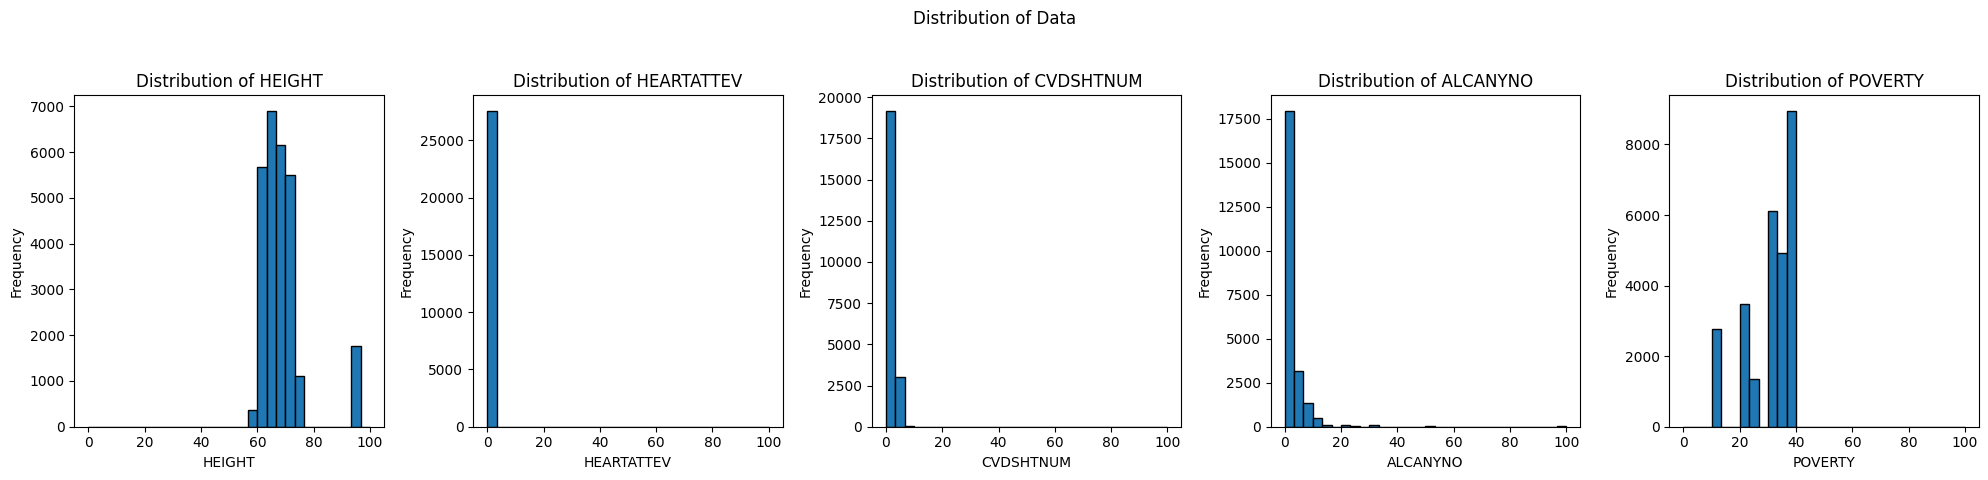

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

bin_settings = {
    'HEIGHT': {'bins': 30, 'range': (0, 100)},
    'HEARTATTEV': {'bins': 30, 'range': (0, 100)},
    'CVDSHTNUM': {'bins': 30, 'range': (0, 100)},
    'ALCANYNO': {'bins': 30, 'range': (0, 100)},
    'POVERTY': {'bins': 30, 'range': (0, 100)}
}


fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # Adjust the number of subplots as needed


for i, var in enumerate(bin_settings.keys()):
    axes[i].hist(df_adults[var], bins=bin_settings[var]['bins'], range=bin_settings[var]['range'], edgecolor='black')
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.suptitle('Distribution of Data')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


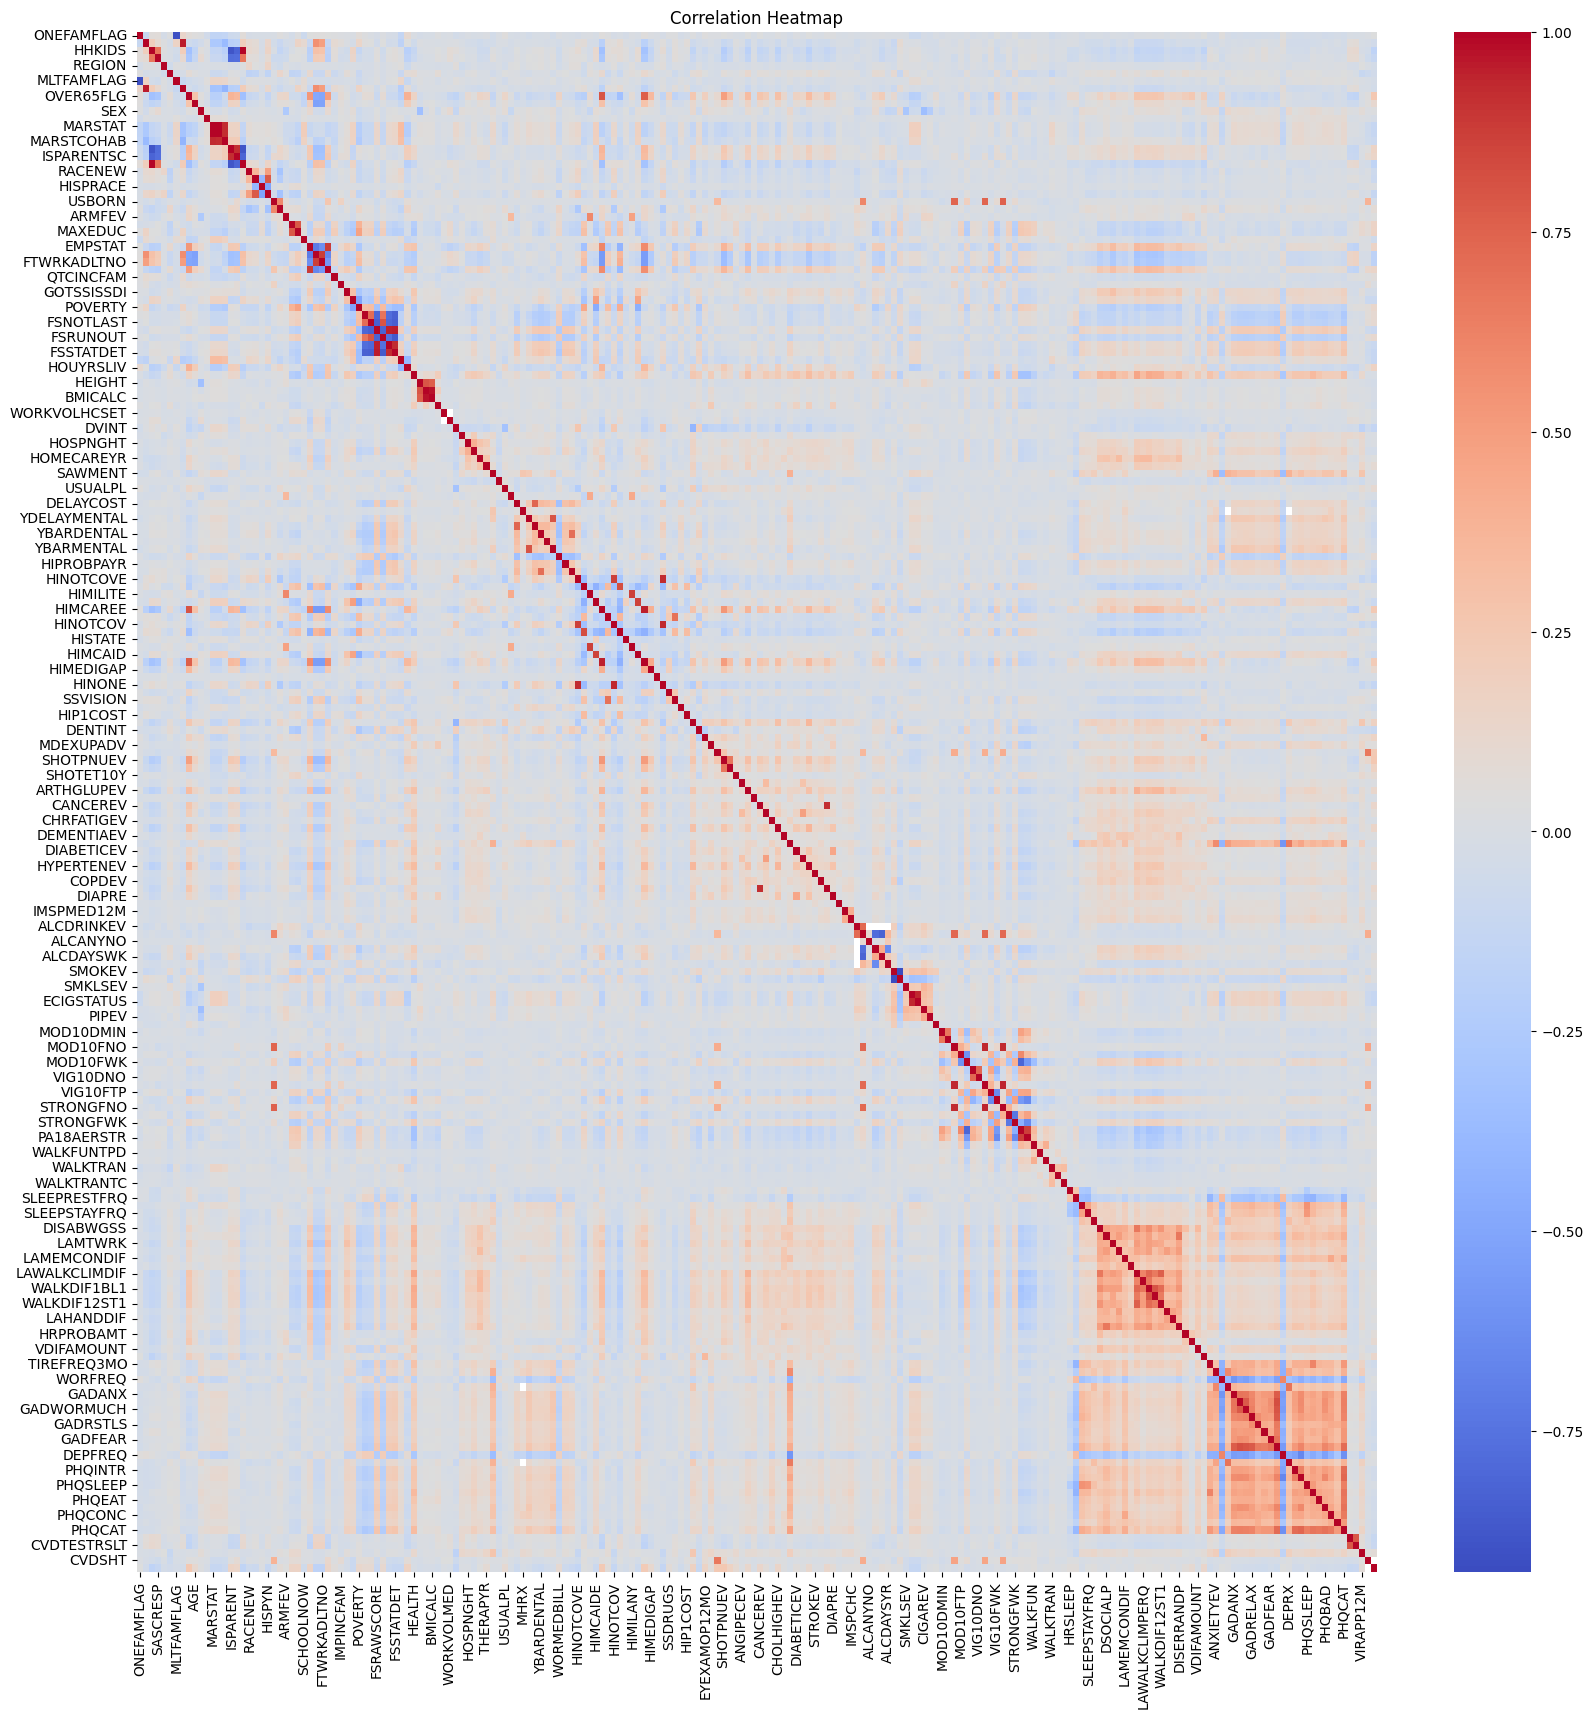

In [ ]:
import seaborn as sns

plt.figure(figsize=(20, 20))
correlation_matrix = df_adults.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap')
plt.show()

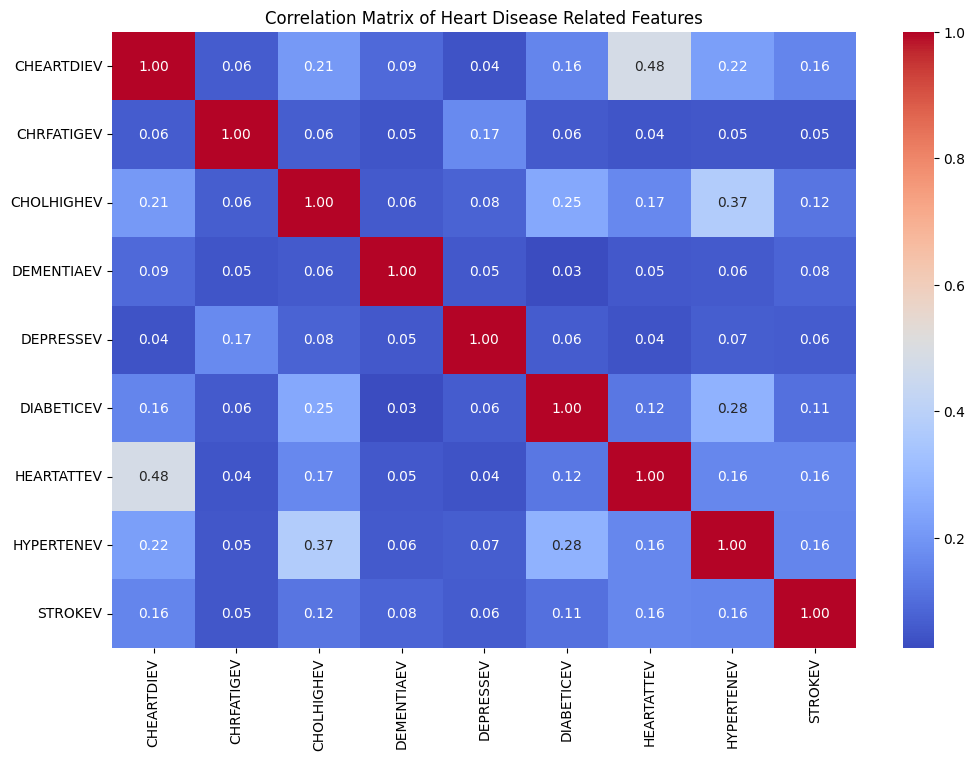

In [ ]:
relevant_columns = [
    'CHEARTDIEV', 'CHRFATIGEV', 'CHOLHIGHEV',
    'DEMENTIAEV', 'DEPRESSEV', 'DIABETICEV', 'HEARTATTEV',
    'HYPERTENEV', 'STROKEV'
]


heart_disease_data = df_adults[relevant_columns]

correlation_matrix = heart_disease_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Heart Disease Related Features")
plt.show()

# Starting Machine Learning on Data

In [ ]:
!pip install imbalanced-learn
!pip install xgboost
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.base import clone
from tqdm.notebook import tqdm
from copy import deepcopy
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Defining own cross validation method so that we can get the average amount of false negatives over the k folds along with the scores
from sklearn.metrics import confusion_matrix

def cross_validation(model, X, y, k):
  scores = []
  # predictions = []

  false_negatives = []
  true_positives = []
  true_negatives = []
  false_positives = []
  kf = KFold(n_splits=k, random_state=42, shuffle=True)
  for train_index, test_index in kf.split(X):
    X_tr, X_t, y_tr, y_t = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    # X_tr, X_t, y_tr, y_t = X[train_index], X[test_index], y[train_index], y[test_index]

    model.fit(X_tr, y_tr)
    pred = model.predict(X_t)
    # false_neg = 0
    tn, fp, fn, tp = confusion_matrix(y_t, pred).ravel()

    # for i in range(len(y_t)):
    #   if y_t.iloc[i] == 1 and pred[i] != y_t.iloc[i]:
    #     false_neg += 1
    true_positives.append(tp)
    true_negatives.append(tn)
    false_positives.append(fp)
    false_negatives.append(fn)
    # predictions.append(false_neg/len(y_t))
    scores.append(model.score(X_t, y_t))

  avg_score = np.mean(scores)
  avg_false_negatives = np.mean(false_negatives)
  avg_true_positives = np.mean(true_positives)
  avg_true_negatives = np.mean(true_negatives)
  avg_false_positives = np.mean(false_positives)
  # return np.mean(scores), np.mean(predictions)
  return avg_score, avg_false_negatives, avg_true_positives, avg_true_negatives, avg_false_positives

In [ ]:
# Define X and Y Columns
outcome = 'CHEARTDIEV'
df_adults = df_adults.sort_values(by=['AGE', 'SEX', 'WEIGHT', 'HEIGHT', 'RACENEW']).reset_index(drop = True)
X = df_adults.drop(columns=[outcome])
y = df_adults[outcome]
dropped_columns.append(outcome)

In [ ]:
# Impute mean value of near neighbors into NIU values or Unknown values
for column in X.columns:
  if X[column].isnull().any():
    for index in X[X[column].isnull()].index.tolist():
      if index < 10:
        X.iloc[index, X.columns.get_loc(column)] = X.iloc[0:20, X.columns.get_loc(column)].mean()
      elif index >= X.shape[0] - 10:
        X.iloc[index, X.columns.get_loc(column)] = X.iloc[int(X.shape[0] - 20):-1, X.columns.get_loc(column)].mean()
      else:
        low = int(index - 10)
        high = int(index + 10)
        X.iloc[int(index), X.columns.get_loc(column)] = X.iloc[low:high, X.columns.get_loc(column)].mean()
# Making sure that we successfully imputed median values into NaN values
X.loc[X.isnull().any(axis = 1)]

,ONEFAMFLAG,HHADULTS,HHKIDS,SASCRESP,REGION,URBRRL,MLTFAMFLAG,NUMADULTS,OVER65FLG,AGE,...,PHQEAT,PHQBAD,PHQCONC,PHQMOVE,PHQCAT,CVDDIAG,CVDTESTRSLT,VIRAPP12M,CVDSHT,CVDSHTNUM


In [ ]:
# Shuffling data because it is sorted currently
X = X.sample(frac=1, random_state=42)
y = y[X.index]

# Using sklearn, Create Training/Testing Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=.7, test_size=.3)
print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)

X_train.shape: (19299, 203)
X_test.shape: (8272, 203)


# Check to see there are no big skews in training data compared to overall data

In [ ]:
# Seeing percentage of classifier variables in test data
y_test.value_counts()/y_test.shape[0]

0.0    0.933873
1.0    0.066127
Name: CHEARTDIEV, dtype: float64

In [ ]:
# Seeing percentage of classifier variables in train data
y_train.value_counts()/y_train.shape[0]

0.0    0.938909
1.0    0.061091
Name: CHEARTDIEV, dtype: float64

In [ ]:
# Seeing if Sex is split well
print('Overall Sex Value Counts:', df_adults['SEX'].value_counts()/df_adults.shape[0])
print('Training Sex Value Counts:', X_train['SEX'].value_counts()/X_train.shape[0])

Overall Sex Value Counts: 2.0    0.544340
1.0    0.455551
Name: SEX, dtype: float64
Training Sex Value Counts: 2.000000    0.544018
1.000000    0.455879
1.526316    0.000104
Name: SEX, dtype: float64


In [ ]:
# Seeing if Age is split well
print('Overall Age Mean:', df_adults['AGE'].mean())
print('Training Age Mean:', X_train['AGE'].mean())

Overall Age Mean: 55.032679264444525
Training Age Mean: 55.23975335509612


In [ ]:
# Seeing if Weight is split well
print('Overall Weight Mean:', df_adults['WEIGHT'].mean())
print('Training Weight Mean:', X_train['WEIGHT'].mean())

Overall Weight Mean: 245.92880200210365
Training Weight Mean: 246.14902326545416


In [ ]:
# Scale the columns of X so that we get better fitting
features = X_train.columns
autoscaler = StandardScaler()
X_train[features] = autoscaler.fit_transform(X_train[features])
X_train.head()

,ONEFAMFLAG,HHADULTS,HHKIDS,SASCRESP,REGION,URBRRL,MLTFAMFLAG,NUMADULTS,OVER65FLG,AGE,...,PHQEAT,PHQBAD,PHQCONC,PHQMOVE,PHQCAT,CVDDIAG,CVDTESTRSLT,VIRAPP12M,CVDSHT,CVDSHTNUM
20185,0.173347,-1.157047,-0.526519,-0.442324,0.301053,1.582235,-0.157129,-1.120252,1.303663,0.237114,...,3.698182,1.289643,-0.368937,4.179021,2.479193,1.598233,1.357198,1.487563,-1.065125,0.094310
9149,0.173347,0.315898,0.610091,-0.442324,1.280986,-1.243910,-0.157129,0.360451,-0.767069,-0.266944,...,-0.435703,-0.364610,1.212657,-0.240734,-0.456014,1.598233,1.357198,1.487563,0.086786,-0.971876
345,0.173347,0.315898,1.746701,-0.442324,0.301053,-0.301862,-0.157129,0.360451,-0.767069,-0.730677,...,0.071967,0.418984,0.296997,0.108194,0.239167,1.598233,1.357198,-0.678494,6.998248,-0.657229
20059,0.173347,1.788843,-0.526519,-0.442324,0.301053,-0.301862,-0.157129,1.841154,1.303663,0.237114,...,3.698182,1.289643,-0.368937,-0.240734,1.011589,-0.629658,-0.741566,1.487563,0.086786,0.416074
2227,-5.768784,1.788843,0.610091,-0.442324,0.301053,-1.243910,6.364214,-1.120252,-0.767069,-0.589541,...,-0.435703,-0.364610,-0.368937,-0.240734,-0.456014,1.598233,1.357198,-0.678494,-1.065125,-0.162044


Getting Baseline score without resampling

In [ ]:
# Define a Linear SVM Classifier & Fit it to Training Data
sgdc = SGDClassifier(random_state=42)
score, false_neg_all_reg, true_pos_all_reg, true_neg_all_reg, false_pos_all_reg = cross_validation(sgdc, X_train, y_train, 5)
accuracy_all_feats = score

sgdc.fit(X_train, y_train)

# Get Baseline Score for SVM on regular data
print("Amount False Negative:", false_neg_all_reg)
print("Amount True Negative:", true_neg_all_reg)
print("Amount False Positive:", false_pos_all_reg)
print("Amount True Positive:", true_pos_all_reg)
print("Overall Score:", accuracy_all_feats)

Amount False Negative: 145.6
Amount True Negative: 3567.6
Amount False Positive: 56.4
Amount True Positive: 90.2
Overall Score: 0.947665574184297


In [ ]:
# Trying Random Over Sampling to see if we get better performance and baseline score
ros = RandomOverSampler(random_state=42)

X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Define a Linear SVM Classifier & Fit it to Training Data
sgdc_ros = SGDClassifier(random_state=42)
score, false_neg_all_ros, true_pos_all_ros, true_neg_all_ros, false_pos_all_ros = cross_validation(sgdc_ros, X_train_ros, y_train_ros, 5)
accuracy_all_feats_ros = score

sgdc_ros.fit(X_train_ros, y_train_ros)

# Get Baseline Score for SVM on random oversample data
print("Amount False Negative:", false_neg_all_ros)
print("Amount True Negative:", true_neg_all_ros)
print("Amount False Positive:", false_pos_all_ros)
print("Amount True Positive:", true_pos_all_ros)
print("Overall Score:", accuracy_all_feats_ros)

Amount False Negative: 582.2
Amount True Negative: 2977.2
Amount False Positive: 646.8
Amount True Positive: 3041.8
Overall Score: 0.8304359823399559


In [ ]:
# Trying SMOTE Over Sampling to see if we get better performance and baseline score
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define a Linear SVM Classifier & Fit it to Training Data
sgdc_smote = SGDClassifier(random_state=42)
score, false_neg_all_smote, true_pos_all_smote, true_neg_all_smote, false_pos_all_smote = cross_validation(sgdc_smote, X_train_smote, y_train_smote, 5)
accuracy_all_feats_smote = score

sgdc_smote.fit(X_train_smote, y_train_smote)

# Get Baseline Score for SVM on random oversample data
print("Amount False Negative:", false_neg_all_smote)
print("Amount True Negative:", true_neg_all_smote)
print("Amount False Positive:", false_pos_all_smote)
print("Amount True Positive:", true_pos_all_smote)
print("Overall Score:", accuracy_all_feats_smote)

Amount False Negative: 396.2
Amount True Negative: 2955.6
Amount False Positive: 668.4
Amount True Positive: 3227.8
Overall Score: 0.8531181015452539


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Features
X = df_adults.drop(['CHEARTDIEV'], axis=1)
# Target
y = df_adults['CHEARTDIEV']

X = X.dropna()
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9484430832057172
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1845
         1.0       0.60      0.34      0.44       114

    accuracy                           0.95      1959
   macro avg       0.78      0.66      0.70      1959
weighted avg       0.94      0.95      0.94      1959



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

datasets = {
    'Regular': X_train,
    'Random Over Sampling': X_train_ros,
    'SMOTE': X_train_smote
}

scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

for name, X_train in datasets.items():
    X_train_scaled = scaler.fit_transform(X_train)

    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train_scaled, y_train)

    y_pred = logreg.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Results for {name} dataset:")
    print(f"Logistic Regression Baseline Accuracy = {accuracy:.4f}")
    print(report)
    print("\n")

Results for Regular dataset:
Logistic Regression Baseline Accuracy = 0.9505
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1845
         1.0       0.62      0.38      0.47       114

    accuracy                           0.95      1959
   macro avg       0.79      0.68      0.72      1959
weighted avg       0.94      0.95      0.94      1959





ValueError: ignored

# Trying feature selection with all 3 different types of data (regular, random over, and smote)

In [ ]:
def forward_feature_selection(model, X, y, k = 5, feat_amount = None):
    # -------------------------------------------------------------------------
    if feat_amount is None:
      feat_amount = X.shape[1]

    n_features = X.shape[1]
    feature_ranking = []
    scores = []
    remaining_features = list(range(n_features))

    while len(remaining_features) != (X.shape[1] - feat_amount):
        best_score = -float('inf')
        best_feature = None
        for feature in remaining_features:
            candidate_features = feature_ranking.copy()
            candidate_features.append(feature)
            X_subset = X.iloc[:, candidate_features]

            cloned_model = clone(model)
            score = cross_val_score(cloned_model, X_subset, y, cv = k)
            mean_score = score.mean()

            if mean_score > best_score:
                best_score = mean_score
                best_feature = feature

        remaining_features.remove(best_feature)
        feature_ranking.append(best_feature)
        scores.append(best_score)
    # -------------------------------------------------------------------------
    column_names = X.columns
    feature_ranking = column_names[feature_ranking]
    return feature_ranking, scores

# Using XGBOOST to see feature importance for regular data

In [ ]:
# fit model to regular training data
xgb_reg = XGBClassifier(random_state=42)
xgb_reg.fit(X_train, y_train)
# plot feature importance
plot_importance(xgb_reg, max_num_features = 25)
plt.show()

XGBoostError: ignored

In [ ]:
# Get accuracy and stats for regular XGBoost
accuracy_all_feats_xgb, false_neg_all_xgb, true_pos_all_xgb, true_neg_all_xgb, false_pos_all_xgb = cross_validation(xgb_reg, X_train, y_train, 5)
print("Baseline SVM Accuracy:", accuracy_all_feats)
print("Baseline XGBoost Accuracy:", accuracy_all_feats_xgb)
print("Baseline XGBoost False Negative:", false_neg_all_xgb)
print("Baseline XGBoost True Negative:", true_neg_all_xgb)
print("Baseline XGBoost False Positive:", false_pos_all_xgb)
print("Baseline XGBoost True Positive:", true_pos_all_xgb)
xgb_reg.fit(X_train, y_train)

# Fit model using each importance as a threshold
importance_xgb = dict(sorted(xgb_reg.get_booster().get_score().items(), key=lambda item: item[1]))
importance_df = pd.DataFrame(importance_xgb.items(), columns = ['Column_Name', 'Importance'])

importance_df['Importance'].describe()

In [ ]:
# Drop columns that were seen as unimportant in XGBoost (only take top 75% of variables) so that forward feature selection can run
X_train_reduced_reg = X_train
print("Shape Before:", X_train_reduced_reg.shape)
for col, value in importance_xgb.items():
  if value < importance_df.Importance.quantile(0.75):
    try:
      X_train_reduced_reg = X_train_reduced_reg.drop(columns = col)
      dropped_columns.append(col)
    except:
      continue

print("Shape after:", X_train_reduced_reg.shape)

# Baseline Accuracy for regular data using Logisitic Regression for top 25%

In [ ]:
# The below code performs logistic regression on the top 25% of most important features found from XGBoost on the regular dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

log_reg = LogisticRegression()
selected_features, feature_scores = forward_feature_selection(log_reg, X_train_reduced_reg, y_train, k=5)

plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size': 8})
plt.xlabel("Name of Features")
plt.xticks(range(1, len(feature_scores)+1), selected_features , rotation = 90)
plt.ylabel("Cross Validation Score")
plt.plot(list(range(1, len(feature_scores)+1)), feature_scores)
X_train_selected = X_train_reduced_reg[selected_features]
X_test_selected = X_test[selected_features]
accuracy_reduced_log_reg, false_neg_reduced_log_reg, true_pos_reduced_log_reg, true_neg_reduced_log_reg, false_pos_reduced_log_reg = cross_validation(log_reg, X_train_selected, y_train, 5)

log_reg.fit(X_train_selected, y_train)



print('Results for Regular Dataset')
print('Accuracy Reduced Features (XGB)', accuracy_reduced_log_reg)

print('False Negative Reduced Features (XGB)', false_neg_reduced_log_reg)
print('True Negative Reduced Features (XGB)', true_pos_reduced_log_reg)
print('False Positive Reduced Features (XGB)', false_pos_reduced_log_reg)
print('True Negative Reduced Features (XGB)', true_neg_reduced_log_reg)

# Apply Forward Feature Selection for XGBoost on reduced variable set

In [ ]:
# Applying Feature Selection on TRAINING Dataset
feature_ranking_xgb_reg, scores = forward_feature_selection(XGBClassifier(random_state=42), X_train_reduced_reg, y_train, 5)

# Plot Features vs. Cross-Validation Scores
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 8})
plt.xlabel("Name of Features")
plt.xticks(range(1, len(scores)+1), feature_ranking_xgb_reg, rotation = 90)
plt.ylabel("Cross Validation Score")
plt.plot(list(range(1, len(scores)+1)), scores)

# Find Feature Set with Best Performance (Max Score)
selected_features_xgb_reg = feature_ranking_xgb_reg[:scores.index(max(scores))+1]
print("Optimal number of features:", len(selected_features_xgb_reg))
print("Optimal features:", selected_features_xgb_reg)

In [ ]:
# Reduce Data to Only Selected Features from Previous Step
X_train_xgb_reg = X_train[selected_features_xgb_reg]      # Reduce Feature Set of X_train
print('X_train_xgb.shape', X_train_xgb_reg.shape)

# Fit Model with Selected Set of Features
xgb_reduced_reg = XGBClassifier(random_state=42)
accuracy_reduced_xgb_reg, false_neg_reduced_xgb_reg, true_pos_reduced_xgb_reg, true_neg_reduced_xgb_reg, false_pos_reduced_xgb_reg = cross_validation(xgb_reduced_reg, X_train_xgb_reg, y_train, 5)
xgb_reduced_reg.fit(X_train_xgb_reg, y_train)

# Score comaprison using Selected Features and all features
print('Accuracy Reduced Features (XGB)', accuracy_reduced_xgb_reg)
print('False Negative Reduced Features (XGB)', false_neg_reduced_xgb_reg)
print("True Negative Reduced Features (XGB)", true_neg_reduced_xgb_reg)
print("False Positive Reduced Features (XGB)", false_pos_reduced_xgb_reg)
print("True Positive Reduced Features (XGB)", true_pos_reduced_xgb_reg)

# Baseline Score for random data using Logistic Regression for top 25%

In [ ]:
 # The below code performs logistic regression on the top 25% of most important features found from XGBoost on the random dataset

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

log_reg = LogisticRegression()
selected_features, feature_scores = forward_feature_selection(log_reg, X_train_reduced_ros, y_train, k=5)

plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size': 8})
plt.xlabel("Name of Features")
plt.xticks(range(1, len(feature_scores)+1), selected_features , rotation = 90)
plt.ylabel("Cross Validation Score")
plt.plot(list(range(1, len(feature_scores)+1)), feature_scores)
X_train_selected = X_train_reduced_reg[selected_features]
X_test_selected = X_test[selected_features]
accuracy_reduced_log_ros, false_neg_reduced_log_ros, true_pos_reduced_log_ros, true_neg_reduced_log_ros, false_pos_reduced_log_ros = cross_validation(log_reg, X_train_selected, y_train, 5)

log_reg.fit(X_train_selected, y_train)



print('Results for Random Reduced Dataset')
print('Accuracy Reduced Features (XGB)', accuracy_reduced_log_ros)

print('False Negative Reduced Features (XGB)', false_neg_reduced_log_ros)
print('True Negative Reduced Features (XGB)', true_pos_reduced_log_ros)
print('False Positive Reduced Features (XGB)', false_pos_reduced_log_ros)
print('True Negative Reduced Features (XGB)', true_neg_reduced_log_ros)

# Using Forward Feature Selection with limit on amount of Variables allowed

In [ ]:
# Applying Feature Selection on TRAINING Dataset
feature_ranking_reg, scores = forward_feature_selection(SGDClassifier(random_state=42), X_train_reduced_reg, y_train, 5)

# Plot Features vs. Cross-Validation Scores
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 8})
plt.xlabel("Name of Features")
plt.xticks(range(1, len(scores)+1), feature_ranking_reg, rotation = 90)
plt.ylabel("Cross Validation Score")
plt.plot(list(range(1, len(scores)+1)), scores)

# Find Feature Set with Best Performance (Max Score)
selected_features = feature_ranking_reg[:scores.index(max(scores))+1]
print("Optimal number of features:", len(selected_features))
print("Optimal features:", selected_features)

In [ ]:
# Reduce Data to Only Selected Features from Previous Step
X_train_ffs_reg = X_train[selected_features]      # Reduce Feature Set of X_train
print('X_train_ffs_reg.shape', X_train_ffs_reg.shape)

# Fit Model with Selected Set of Features
sgdc_ffs_reg = SGDClassifier(random_state=42)
score, false_neg_ffs_reg, true_pos_ffs_reg, true_neg_ffs_reg, false_pos_ffs_reg = cross_validation(sgdc_ffs_reg, X_train_ffs_reg, y_train, 5)
accuracy_reduced_ffs_reg = score

sgdc_ffs_reg.fit(X_train_ffs_reg, y_train)

# Baseline Score with Score using Selected Features
print('Accuracy Reduced Features (SVM)', accuracy_reduced_ffs_reg)
print('False Negative Reduced Features (SVM)', false_neg_ffs_reg)
print("True Negative Reduced Features (SVM)", true_neg_ffs_reg)
print("False Positive Reduced Features (SVM)", false_pos_ffs_reg)
print("True Positive Reduced Features (SVM)", true_pos_ffs_reg)

# Using XGBOOST to see feature importance for Random oversample data

In [ ]:
# fit model to Random oversample training data
xgb_ros = XGBClassifier(random_state=42)
xgb_ros.fit(X_train_ros, y_train_ros)
# plot feature importance
plot_importance(xgb_ros, max_num_features = 25)
plt.show()

In [ ]:
# make predictions for test data and evaluate
accuracy_all_feats_xgb_ros, false_neg_all_xgb_ros, true_pos_all_xgb_ros, true_neg_all_xgb_ros, false_pos_all_xgb_ros = cross_validation(xgb_ros, X_train_ros, y_train_ros, 5)
print("Baseline SVM Accuracy:", accuracy_all_feats_ros)
print("Baseline XGBoost Accuracy:", accuracy_all_feats_xgb_ros)
print("Baseline XGBoost False Negative:", false_neg_all_xgb_ros)
print('Baseline XGBoost True Negative:', true_neg_all_xgb_ros)
print("Baseline XGBoost False Positive:", false_pos_all_xgb_ros)
print("Baseline XGBoost True Positive:", true_pos_all_xgb_ros)
xgb_ros.fit(X_train_ros, y_train_ros)

# Fit model using each importance as a threshold
importance_xgb = dict(sorted(xgb_ros.get_booster().get_score().items(), key=lambda item: item[1]))
xgboost_var_acc_ros = pd.DataFrame(columns=['Num_Variables','Accuracy', 'False_Negative', 'Variables'])
importance_df = pd.DataFrame(importance_xgb.items(), columns = ['Column_Name', 'Importance'])

importance_df['Importance'].describe()

In [ ]:
# Drop columns that were seen as unimportant in XGBoost (only take top 25% of variables) so that forward feature selection can run
X_train_reduced_ros = X_train_ros
print("Shape Before:", X_train_reduced_ros.shape)
for col, value in importance_xgb.items():
  if value < importance_df.Importance.quantile(0.75):
    try:
      X_train_reduced_ros = X_train_reduced_ros.drop(columns = col)
    except:
      continue

print("Shape After:", X_train_reduced_ros.shape)

In [ ]:
# Applying Feature Selection on TRAINING Dataset
feature_ranking_xgb_ros, scores = forward_feature_selection(XGBClassifier(random_state=42), X_train_reduced_ros, y_train_ros, 5)

# Plot Features vs. Cross-Validation Scores
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 8})
plt.xlabel("Name of Features")
plt.xticks(range(1, len(scores)+1), feature_ranking_xgb_ros, rotation = 90)
plt.ylabel("Cross Validation Score")
plt.plot(list(range(1, len(scores)+1)), scores)

# Find Feature Set with Best Performance (Max Score)
selected_features_xgb_ros = feature_ranking_xgb_ros[:scores.index(max(scores))+1]
print("Optimal number of features:", len(selected_features_xgb_ros))
print("Optimal features:", selected_features_xgb_ros)

In [ ]:
# Reduce Data to Only Selected Features from Previous Step
X_train_xgb_ros = X_train_ros[selected_features_xgb_ros]      # Reduce Feature Set of X_train
print('X_train_xgb.shape', X_train_xgb_ros.shape)

# Fit Model with Selected Set of Features
xgb_reduced_ros = XGBClassifier(random_state=42)
accuracy_reduced_xgb_ros, false_neg_reduced_xgb_ros, true_pos_reduced_xgb_ros, true_neg_reduced_xgb_ros, false_pos_reduced_xgb_ros = cross_validation(xgb_reduced_ros, X_train_xgb_ros, y_train_ros, 5)
xgb_reduced_ros.fit(X_train_xgb_ros, y_train_ros)

# Score using Selected Features
print('Accuracy Reduced Features (XGB)', accuracy_reduced_xgb_ros)
print('False Negative Reduced Features (XGB)', false_neg_reduced_xgb_ros)
print("True Negative Reduced Features (XGB)", true_neg_reduced_xgb_ros)
print("False Positive Reduced Features (XGB)", false_pos_reduced_xgb_ros)
print("True Positive Reduced Features (XGB)", true_pos_reduced_xgb_ros)

# Baseline Accuracy for SMOTE data using Logisitic Regression for top 25%



In [ ]:
 # The below code performs logistic regression on the top 25% of most important features found from XGBoost on the SMOTE dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

log_reg = LogisticRegression()
selected_features, feature_scores = forward_feature_selection(log_reg, X_train_reduced_smote, y_train, k=5)

plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size': 8})
plt.xlabel("Name of Features")
plt.xticks(range(1, len(feature_scores)+1), selected_features , rotation = 90)
plt.ylabel("Cross Validation Score")
plt.plot(list(range(1, len(feature_scores)+1)), feature_scores)
X_train_selected = X_train_reduced_reg[selected_features]
X_test_selected = X_test[selected_features]
accuracy_reduced_log_smote,false_neg_reduced_log_smote,true_pos_reduced_log_smote,true_neg_reduced_log_smote,false_pos_reduced_log_smote = cross_validation(log_reg, X_train_selected, y_train, 5)

log_reg.fit(X_train_selected, y_train)



print('Results for SMOTE Dataset')
print('Accuracy Reduced Features (XGB)', accuracy_reduced_log_smote)

print('False Negative Reduced Features (XGB)', false_neg_reduced_log_smote)
print('True Negative Reduced Features (XGB)', true_pos_reduced_log_smote)
print('False Positive Reduced Features (XGB)', false_pos_reduced_log_smote)
print('True Negative Reduced Features (XGB)', true_neg_reduced_log_smote)

# Using Forward Feature Selection with limit on amount of Variables allowed

In [ ]:
# Applying Feature Selection on TRAINING Dataset
feature_ranking_ros, scores = forward_feature_selection(SGDClassifier(random_state=42), X_train_reduced_ros, y_train_ros, 5)

# Plot Features vs. Cross-Validation Scores
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 8})
plt.xlabel("Name of Features")
plt.xticks(range(1, len(scores)+1), feature_ranking_ros, rotation = 90)
plt.ylabel("Cross Validation Score")
plt.plot(list(range(1, len(scores)+1)), scores)

# Find Feature Set with Best Performance (Max Score)
selected_features_ros = feature_ranking_ros[:scores.index(max(scores))+1]
print("Optimal number of features:", len(selected_features_ros))
print("Optimal features:", selected_features_ros)

In [ ]:
# Reduce Data to Only Selected Features from Previous Step
X_train_ffs_ros = X_train_ros[selected_features_ros]      # Reduce Feature Set of X_train
print('X_train_ffs_ros.shape', X_train_ffs_ros.shape)
# Fit Model with Selected Set of Features
sgdc_ffs_ros = SGDClassifier(random_state=42)
accuracy_reduced_ffs_ros, false_neg_ffs_ros, true_pos_ffs_ros, true_neg_ffs_ros, false_pos_ffs_ros = cross_validation(sgdc_ffs_ros, X_train_ffs_ros, y_train_ros, 5)

sgdc_ffs_ros.fit(X_train_ffs_ros, y_train_ros)

# Baseline Score with Score using Selected Features
print('Accuracy Reduced Features (SVM)', accuracy_reduced_ffs_ros)
print('False Negative Reduced Features (SVM)', false_neg_ffs_ros)
print("True Negative Reduced Features (SVM)", true_neg_ffs_ros)
print("False Positive Reduced Features (SVM)", false_pos_ffs_ros)
print("True Positive Reduced Features (SVM)", true_pos_ffs_ros)

# Using XGBOOST to see feature importance for SMOTE data

In [ ]:
# fit model to SMOTE training data
xgb_smote = XGBClassifier(random_state=42)
xgb_smote.fit(X_train_smote, y_train_smote)
# plot feature importance
plot_importance(xgb_smote, max_num_features = 25)
plt.show()

In [ ]:
# make predictions for test data and evaluate
accuracy_all_feats_xgb_smote, false_neg_all_xgb_smote, true_pos_all_xgb_smote, true_neg_all_xgb_smote, false_pos_all_xgb_smote = cross_validation(xgb_smote, X_train_smote, y_train_smote, 5)
print("Baseline SVM Accuracy:", accuracy_all_feats_smote)
print("Baseline XGBoost Accuracy:", accuracy_all_feats_xgb_smote)
print("Baseline XGBoost False Negative:", false_neg_all_xgb_smote)
print('Baseline XGBoost True Negative:', true_neg_all_xgb_smote)
print("Baseline XGBoost False Positive:", false_pos_all_xgb_smote)
print("Baseline XGBoost True Positive:", true_pos_all_xgb_smote)
xgb_smote.fit(X_train_smote, y_train_smote)

# Fit model using each importance as a threshold
importance_xgb = dict(sorted(xgb_smote.get_booster().get_score().items(), key=lambda item: item[1]))
xgboost_var_acc_smote = pd.DataFrame(columns=['Num_Variables','Accuracy', 'False_Negative', 'Variables'])
importance_df = pd.DataFrame(importance_xgb.items(), columns = ['Column_Name', 'Importance'])

importance_df['Importance'].describe()

In [ ]:
# Drop columns that were seen as unimportant in XGBoost (only take top 75% of variables) so that forward feature selection can run
X_train_reduced_smote = X_train_smote
print("Shape Before:", X_train_reduced_smote.shape)
for col, value in importance_xgb.items():
  if value < importance_df.Importance.quantile(0.75):
    try:
      X_train_reduced_smote = X_train_reduced_smote.drop(columns = col)
    except:
      continue

print("Shape Before:", X_train_reduced_smote.shape)

# Apply Forward Feature Selection for XGBoost on reduced SMOTE variable set

In [ ]:
# Applying Feature Selection on TRAINING Dataset
feature_ranking_xgb_smote, scores = forward_feature_selection(XGBClassifier(random_state=42), X_train_reduced_smote, y_train_smote, 5)

# Plot Features vs. Cross-Validation Scores
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 8})
plt.xlabel("Name of Features")
plt.xticks(range(1, len(scores)+1), feature_ranking_xgb_smote, rotation = 90)
plt.ylabel("Cross Validation Score")
plt.plot(list(range(1, len(scores)+1)), scores)

# Find Feature Set with Best Performance (Max Score)
selected_features_xgb_smote = feature_ranking_xgb_smote[:scores.index(max(scores))+1]
print("Optimal number of features:", len(selected_features_xgb_smote))
print("Optimal features:", selected_features_xgb_smote)

In [ ]:
# Reduce Data to Only Selected Features from Previous Step
X_train_xgb_smote = X_train_smote[selected_features_xgb_smote]      # Reduce Feature Set of X_train
print('X_train_xgb_smote.shape', X_train_xgb_smote.shape)

# Fit Model with Selected Set of Features
xgb_reduced_smote = XGBClassifier(random_state=42)
accuracy_reduced_xgb_smote, false_neg_reduced_xgb_smote, true_pos_reduced_xgb_smote, true_neg_reduced_xgb_smote, false_pos_reduced_xgb_smote = cross_validation(xgb_reduced_smote, X_train_xgb_smote, y_train_smote, 5)
xgb_reduced_smote.fit(X_train_xgb_smote, y_train_smote)

# Score using Selected Features
print('Accuracy Reduced Features (XGB)', accuracy_reduced_xgb_smote)
print('False Negative Reduced Features (XGB)', false_neg_reduced_xgb_smote)
print("True Negative Reduced Features (XGB)", true_neg_reduced_xgb_smote)
print("False Positive Reduced Features (XGB)", false_pos_reduced_xgb_smote)
print("True Positive Reduced Features (XGB)", true_pos_reduced_xgb_smote)

# Using Forward Feature Selection with limit on amount of Variables allowed

In [ ]:
# Applying Feature Selection on TRAINING Dataset
feature_ranking_smote, scores = forward_feature_selection(SGDClassifier(random_state=42), X_train_reduced_smote, y_train_smote, 5)

# Plot Features vs. Cross-Validation Scores
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 8})
plt.xlabel("Name of Features")
plt.xticks(range(1, len(scores)+1), feature_ranking_smote, rotation = 90)
plt.ylabel("Cross Validation Score")
plt.plot(list(range(1, len(scores)+1)), scores)

# Find Feature Set with Best Performance (Max Score)
selected_features_smote = feature_ranking_smote[:scores.index(max(scores))+1]
print("Optimal number of features:", len(selected_features_smote))
print("Optimal features:", selected_features_smote)

In [ ]:
# Reduce Data to Only Selected Features from Previous Step
X_train_ffs_smote = X_train_smote[selected_features_smote]      # Reduce Feature Set of X_train
print('X_train_ffs_smote.shape', X_train_ffs_smote.shape)

# Fit Model with Selected Set of Features
sgdc_ffs_smote = SGDClassifier(random_state=42)
score, false_neg_ffs_smote, true_pos_ffs_smote, true_neg_ffs_smote, false_pos_ffs_smote = cross_validation(sgdc_ffs_smote, X_train_ffs_smote, y_train_smote, 5)
accuracy_reduced_ffs_smote = score
sgdc_ffs_smote.fit(X_train_ffs_smote, y_train_smote)

# Baseline Score with Score using Selected Features
print('Accuracy Reduced Features (SVM)', accuracy_reduced_ffs_smote)
print('False Negative Reduced Features (SVM)', false_neg_ffs_smote)
print("True Negative Reduced Features (SVM)", true_neg_ffs_smote)
print("False Positive Reduced Features (SVM)", false_pos_ffs_smote)
print("True Positive Reduced Features (SVM)", true_pos_ffs_smote)

# Plotting accuracy and false negative percentage for all SVM models on training data using cross validation

In [ ]:
# Plot Performance of all SVM models on the training data
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
plt.rcParams.update({'font.size': 8})
data = ['No Oversample', 'Random Oversample', 'SMOTE Oversample']
X_axis = np.arange(len(data))

ax[0].bar(X_axis - 0.2, [accuracy_all_feats, accuracy_all_feats_ros, accuracy_all_feats_smote], 0.4, label = 'All Features', color = 'r')
ax[0].bar(X_axis + 0.2, [accuracy_reduced_ffs_reg, accuracy_reduced_ffs_ros, accuracy_reduced_ffs_smote], 0.4, label = 'Forward Feature Selection', color = 'g')

ax[0].set_xticks(X_axis, data)
ax[0].set_xlabel("Data Used")
ax[0].set_ylabel("Cross Validation Score")
ax[0].set_title("Comparison of Forward Feature Selection and All Variables")
ax[0].legend()

ax[1].bar(X_axis - 0.2, [false_neg_all_reg/(false_neg_all_reg + true_pos_all_reg), false_neg_all_ros/(false_neg_all_ros + true_pos_all_ros), false_neg_all_smote/(false_neg_all_smote + true_pos_all_smote)], 0.4, label = 'All Features', color = 'r')
ax[1].bar(X_axis + 0.2, [false_neg_ffs_reg/(false_neg_ffs_reg + true_pos_ffs_reg), false_neg_ffs_ros/(false_neg_ffs_ros + true_pos_ffs_ros), false_neg_ffs_smote/(false_neg_ffs_smote + true_pos_ffs_smote)], 0.4, label = 'Forward Feature Selection', color = 'g')

ax[1].set_xticks(X_axis, data)
ax[1].set_xlabel("Data Used")
ax[1].set_ylabel("Percentage of False Negatives")
ax[1].set_title("Comparison of False Negatives to Actual Positive Cases")
ax[1].legend()

plt.show()

# Plotting accuracy and false negative percentage for all XGBoost models on training data using cross validation

In [ ]:
# Plot Performance of all XGB models on the training data
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
plt.rcParams.update({'font.size': 8})
data = ['No Oversample', 'Random Oversample', 'SMOTE Oversample']
X_axis = np.arange(len(data))

ax[0].bar(X_axis - 0.2, [accuracy_all_feats_xgb, accuracy_all_feats_xgb_ros, accuracy_all_feats_xgb_smote], 0.4, label = 'All Features', color = 'r')
ax[0].bar(X_axis + 0.2, [accuracy_reduced_xgb_reg, accuracy_reduced_xgb_ros, accuracy_reduced_xgb_smote], 0.4, label = 'Forward Feature Selection', color = 'g')

ax[0].set_xticks(X_axis, data)
ax[0].set_xlabel("Data Used")
ax[0].set_ylabel("Cross Validation Score")
ax[0].set_title("Comparison of Forward Feature Selection and All Variables")
ax[0].legend()

ax[1].bar(X_axis - 0.2, [false_neg_all_xgb/(false_neg_all_xgb + true_pos_all_xgb), false_neg_all_xgb_ros/(false_neg_all_xgb_ros + true_pos_all_xgb_ros), false_neg_all_xgb_smote/(false_neg_all_xgb_smote + true_pos_all_xgb_smote)], 0.4, label = 'All Features', color = 'r')
ax[1].bar(X_axis + 0.2, [false_neg_reduced_xgb_reg/(false_neg_reduced_xgb_reg + true_pos_reduced_xgb_reg), false_neg_reduced_xgb_ros/(false_neg_reduced_xgb_ros + true_pos_reduced_xgb_ros), false_neg_reduced_xgb_smote/(false_neg_reduced_xgb_smote + true_pos_reduced_xgb_smote)], 0.4, label = 'Forward Feature Selection', color = 'g')

ax[1].set_xticks(X_axis, data)
ax[1].set_xlabel("Data Used")
ax[1].set_ylabel("Percentage of False Negatives")
ax[1].set_title("Comparison of False Negatives to Actual Positive Cases")
ax[1].legend()

plt.show()

# Plotting accuracy and false negative percentage for all Logistic Regression models on training data using cross validation

In [ ]:
# Plot Performance of all XGB models on the training data
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
plt.rcParams.update({'font.size': 8})
data = ['No Oversample', 'Random Oversample', 'SMOTE Oversample']
X_axis = np.arange(len(data))

ax[0].bar(X_axis - 0.2, [accuracy_all_feats_log, accuracy_all_feats_log_ros, accuracy_all_feats_log_smote], 0.4, label = 'All Features', color = 'r')
ax[0].bar(X_axis + 0.2, [accuracy_reduced_log_reg, accuracy_reduced_log_ros, accuracy_reduced_log_smote], 0.4, label = 'Forward Feature Selection', color = 'g')

ax[0].set_xticks(X_axis, data)
ax[0].set_xlabel("Data Used")
ax[0].set_ylabel("Cross Validation Score")
ax[0].set_title("Comparison of Forward Feature Selection and All Variables")
ax[0].legend()

ax[1].bar(X_axis - 0.2, [false_neg_all_log/(false_neg_all_log + true_pos_all_log), false_neg_all_log_ros/(false_neg_all_log_ros + true_pos_all_log_ros), false_neg_all_log_smote/(false_neg_all_log_smote + true_pos_all_log_smote)], 0.4, label = 'All Features', color = 'r')
ax[1].bar(X_axis + 0.2, [false_neg_reduced_log_reg/(false_neg_reduced_log_reg + true_pos_reduced_log_reg), false_neg_reduced_log_ros/(false_neg_reduced_log_ros + true_pos_reduced_log_ros), false_neg_reduced_log_smote/(false_neg_reduced_log_smote + true_pos_reduced_log_smote)], 0.4, label = 'Forward Feature Selection', color = 'g')

ax[1].set_xticks(X_axis, data)
ax[1].set_xlabel("Data Used")
ax[1].set_ylabel("Percentage of False Negatives")
ax[1].set_title("Comparison of False Negatives to Actual Positive Cases")
ax[1].legend()

plt.show()

# Table with all scores for all models

In [ ]:
model_performance_data = {
    'Model': [
        'SVM on all Regular Data',
        'SVM on all Randomly Oversampled Data',
        'SVM on all SMOTE Oversampled Data',
        'XGB on all Regular Data',
        'XGB on all Randomly Oversampled Data',
        'XGB on all SMOTE Oversampled Data',
        'Logistic Regression on all Regular Data',
        'Logistic Regression on all Randomly Oversampled Data',
        'Logistic Regression on all SMOTE Oversampled Data',
        'SVM on reduced (FFS) Regular Data',
        'SVM on reduced (FFS) Randomly Oversampled Data',
        'SVM on reduced (FFS) SMOTE Oversampled Data',
        'XGB on reduced (FFS) Regular Data',
        'XGB on reduced (FFS) Randomly Oversampled Data',
        'XGB on reduced (FFS) SMOTE Oversampled Data',
        'Logistic Regression on reduced (FFS) Regular Data',
        'Logistic Regression on reduced (FFS) Randomly Oversampled Data',
        'Logistic Regression on reduced (FFS) SMOTE Oversampled Data',
    ],
    'Accuracy': [
        accuracy_all_feats,
        accuracy_all_feats_ros,
        accuracy_all_feats_smote,
    ],
    'True Positive': [
        true_pos_all_reg,
        true_pos_all_ros,
        true_pos_all_smote,
    ],
    'True Negative': [

    ],
    'False Positive': [

    ],
    'False Negative': [

    ]
}

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance_data)

# Display the DataFrame
print(performance_df)

# Trying on test data

In [ ]:
# Scaling test data to the scaled dimensions found from X_train
X_test[features] = autoscaler.transform(X_test[features])
X_test.head()

In [ ]:
# Try all features from base SVM test dataset
accuracy_all_feats_test = sgdc.score(X_test, y_test)
pred = sgdc.predict(X_test)

tn_all_reg_test, fp_all_reg_test, fn_all_reg_test, tp_all_reg_test = confusion_matrix(y_test, pred).ravel()


# Get Baseline Score on test data for regular data trained model
print("Amount False Negative:", fn_all_reg_test)
print("Amount True Negative:", tn_all_reg_test)
print("Amount False Positive:", fp_all_reg_test)
print("Amount True Positive:", tp_all_reg_test)
print("Overall Score:", accuracy_all_feats_test)

In [ ]:
# Try all features from ros SVM test dataset
accuracy_all_feats_ros_test = sgdc_ros.score(X_test, y_test)
pred = sgdc_ros.predict(X_test)

tn_all_ros_test, fp_all_ros_test, fn_all_ros_test, tp_all_ros_test = confusion_matrix(y_test, pred).ravel()


# Get Baseline Score on test data for random oversample data trained model
print("Amount False Negative:", fn_all_ros_test)
print("Amount True Negative:", tn_all_ros_test)
print("Amount False Positive:", fp_all_ros_test)
print("Amount True Positive:", tp_all_ros_test)
print("Overall Score:", accuracy_all_feats_ros_test)

In [ ]:
# Try all features from smote SVM test dataset
accuracy_all_feats_smote_test = sgdc_smote.score(X_test, y_test)
pred = sgdc_smote.predict(X_test)

tn_all_smote_test, fp_all_smote_test, fn_all_smote_test, tp_all_smote_test = confusion_matrix(y_test, pred).ravel()


# Get Baseline Score on test data for regular data trained model
print("Amount False Negative:", fn_all_smote_test)
print("Amount True Negative:", tn_all_smote_test)
print("Amount False Positive:", fp_all_smote_test)
print("Amount True Positive:", tp_all_smote_test)
print("Overall Score:", accuracy_all_feats_smote_test)

In [ ]:
# Try ffs on base data model for SVM test dataset
accuracy_ffs_test = sgdc_ffs_reg.score(X_test[selected_features], y_test)
pred = sgdc_ffs_reg.predict(X_test[selected_features])

tn_ffs_reg_test, fp_ffs_reg_test, fn_ffs_reg_test, tp_ffs_reg_test = confusion_matrix(y_test, pred).ravel()


# Get Baseline Score on test data for regular data trained model
print("Amount False Negative:", fn_ffs_reg_test)
print("Amount True Negative:", tn_ffs_reg_test)
print("Amount False Positive:", fp_ffs_reg_test)
print("Amount True Positive:", tp_ffs_reg_test)
print("Overall Score:", accuracy_ffs_test)

In [ ]:
# Try ffs on ros data model for SVM test dataset
accuracy_ffs_ros_test = sgdc_ffs_ros.score(X_test[selected_features_ros], y_test)
pred = sgdc_ffs_ros.predict(X_test[selected_features_ros])

tn_ffs_ros_test, fp_ffs_ros_test, fn_ffs_ros_test, tp_ffs_ros_test = confusion_matrix(y_test, pred).ravel()


# Get Baseline Score on test data for regular data trained model
print("Amount False Negative:", fn_ffs_ros_test)
print("Amount True Negative:", tn_ffs_ros_test)
print("Amount False Positive:", fp_ffs_ros_test)
print("Amount True Positive:", tp_ffs_ros_test)
print("Overall Score:", accuracy_ffs_ros_test)

In [ ]:
# Try ffs on smote data model for SVM test dataset
accuracy_ffs_smote_test = sgdc_ffs_smote.score(X_test[selected_features_smote], y_test)
pred = sgdc_ffs_smote.predict(X_test[selected_features_smote])

tn_ffs_smote_test, fp_ffs_smote_test, fn_ffs_smote_test, tp_ffs_smote_test = confusion_matrix(y_test, pred).ravel()


# Get Baseline Score on test data for regular data trained model
print("Amount False Negative:", fn_ffs_smote_test)
print("Amount True Negative:", tn_ffs_smote_test)
print("Amount False Positive:", fp_ffs_smote_test)
print("Amount True Positive:", tp_ffs_smote_test)
print("Overall Score:", accuracy_ffs_smote_test)

# Plot the performances on the test dataset

In [ ]:
# Plot Performance of all models on the test data
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
plt.rcParams.update({'font.size': 8})
data = ['No Oversample', 'Random Oversample', 'SMOTE Oversample']
X_axis = np.arange(len(data))

ax[0].bar(X_axis - 0.2, [accuracy_all_feats_test, accuracy_all_feats_ros_test, accuracy_all_feats_smote_test], 0.4, label = 'All Features', color = 'r')
ax[0].bar(X_axis + 0.2, [accuracy_ffs_test, accuracy_ffs_ros_test, accuracy_ffs_smote_test], 0.4, label = 'Forward Feature Selection', color = 'g')

ax[0].set_xticks(X_axis, data)
ax[0].set_xlabel("Data Used")
ax[0].set_ylabel("Score")
ax[0].set_title("Comparison of Forward Feature Selection and All Variables")
ax[0].legend()

ax[1].bar(X_axis - 0.2, [fn_all_reg_test/(fn_all_reg_test + tp_all_reg_test), fn_all_ros_test/(fn_all_ros_test + tp_all_ros_test), fn_all_smote_test/(fn_all_smote_test + tp_all_smote_test)], 0.4, label = 'All Features', color = 'r')
ax[1].bar(X_axis + 0.2, [fn_ffs_reg_test/(fn_ffs_reg_test + tp_ffs_reg_test), fn_ffs_ros_test/(fn_ffs_ros_test + tp_ffs_ros_test), fn_ffs_smote_test/(fn_ffs_smote_test + tp_ffs_smote_test)], 0.4, label = 'Forward Feature Selection', color = 'g')

ax[1].set_xticks(X_axis, data)
ax[1].set_xlabel("Data Used")
ax[1].set_ylabel("Percentage of False Negative")
ax[1].set_title("Comparison of False Negatives to Actual Positive Cases")
ax[1].legend()

plt.show()

# Best model seems to be SMOTE Oversample all features

# Try XGBoost models on test data

In [ ]:
# Try all features from base XGBoost on test dataset
accuracy_all_feats_xgb_test = xgb_reg.score(X_test, y_test)
pred = xgb_reg.predict(X_test)

tn_xgb_all_reg_test, fp_xgb_all_reg_test, fn_xgb_all_reg_test, tp_xgb_all_reg_test = confusion_matrix(y_test, pred).ravel()


# Get Baseline Score on test data for regular data trained model
print("Amount False Negative:", fn_xgb_all_reg_test)
print("Amount True Negative:", tn_xgb_all_reg_test)
print("Amount False Positive:", fp_xgb_all_reg_test)
print("Amount True Positive:", tp_xgb_all_reg_test)
print("Overall Score:", accuracy_all_feats_xgb_test)

In [ ]:
# Try all features from ROS XGBoost on test dataset
accuracy_all_feats_ros_xgb_test = xgb_ros.score(X_test, y_test)
pred = xgb_ros.predict(X_test)

tn_xgb_all_ros_test, fp_xgb_all_ros_test, fn_xgb_all_ros_test, tp_xgb_all_ros_test = confusion_matrix(y_test, pred).ravel()


# Get Baseline Score on test data for random oversample data trained model
print("Amount False Negative:", fn_xgb_all_ros_test)
print("Amount True Negative:", tn_xgb_all_ros_test)
print("Amount False Positive:", fp_xgb_all_ros_test)
print("Amount True Positive:", tp_xgb_all_ros_test)
print("Overall Score:", accuracy_all_feats_ros_xgb_test)

In [ ]:
# Try all features from SMOTE XGBoost on test dataset
accuracy_all_feats_smote_xgb_test = xgb_smote.score(X_test, y_test)
pred = xgb_smote.predict(X_test)

tn_xgb_all_smote_test, fp_xgb_all_smote_test, fn_xgb_all_smote_test, tp_xgb_all_smote_test = confusion_matrix(y_test, pred).ravel()


# Get Baseline Score on test data for SMOTE oversample data trained model
print("Amount False Negative:", fn_xgb_all_smote_test)
print("Amount True Negative:", tn_xgb_all_smote_test)
print("Amount False Positive:", fp_xgb_all_smote_test)
print("Amount True Positive:", tp_xgb_all_smote_test)
print("Overall Score:", accuracy_all_feats_smote_xgb_test)

In [ ]:
# Try select features from base XGBoost on test dataset
accuracy_reduced_xgb_test = xgb_reduced_reg.score(X_test[selected_features_xgb_reg], y_test)
pred = xgb_reduced_reg.predict(X_test[selected_features_xgb_reg])

tn_xgb_ffs_reg_test, fp_xgb_ffs_reg_test, fn_xgb_ffs_reg_test, tp_xgb_ffs_reg_test = confusion_matrix(y_test, pred).ravel()


# Get reduced feature Score on test data for regular data trained model
print("Amount False Negative:", fn_xgb_ffs_reg_test)
print("Amount True Negative:", tn_xgb_ffs_reg_test)
print("Amount False Positive:", fp_xgb_ffs_reg_test)
print("Amount True Positive:", tp_xgb_ffs_reg_test)
print("Overall Score:", accuracy_reduced_xgb_test)

In [ ]:
# Try select features from ROS XGBoost on test dataset
accuracy_reduced_xgb_ros_test = xgb_reduced_ros.score(X_test[selected_features_xgb_ros], y_test)
pred = xgb_reduced_ros.predict(X_test[selected_features_xgb_ros])

tn_xgb_ffs_ros_test, fp_xgb_ffs_ros_test, fn_xgb_ffs_ros_test, tp_xgb_ffs_ros_test = confusion_matrix(y_test, pred).ravel()


# Get reduced feature Score on test data for random oversample data trained model
print("Amount False Negative:", fn_xgb_ffs_ros_test)
print("Amount True Negative:", tn_xgb_ffs_ros_test)
print("Amount False Positive:", fp_xgb_ffs_ros_test)
print("Amount True Positive:", tp_xgb_ffs_ros_test)
print("Overall Score:", accuracy_reduced_xgb_ros_test)

In [ ]:
# Try select features from SMOTE XGBoost on test dataset
accuracy_reduced_xgb_smote_test = xgb_reduced_smote.score(X_test[selected_features_xgb_smote], y_test)
pred = xgb_reduced_smote.predict(X_test[selected_features_xgb_smote])

tn_xgb_ffs_smote_test, fp_xgb_ffs_smote_test, fn_xgb_ffs_smote_test, tp_xgb_ffs_smote_test = confusion_matrix(y_test, pred).ravel()


# Get reduced feature Score on test data for SMOTE oversample data trained model
print("Amount False Negative:", fn_xgb_ffs_smote_test)
print("Amount True Negative:", tn_xgb_ffs_smote_test)
print("Amount False Positive:", fp_xgb_ffs_smote_test)
print("Amount True Positive:", tp_xgb_ffs_smote_test)
print("Overall Score:", accuracy_reduced_xgb_smote_test)

In [ ]:
# Plot Performance of all models on the test data
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
plt.rcParams.update({'font.size': 8})
data = ['No Oversample', 'Random Oversample', 'SMOTE Oversample']
X_axis = np.arange(len(data))

ax[0].bar(X_axis - 0.2, [accuracy_all_feats_xgb_test, accuracy_all_feats_ros_xgb_test, accuracy_all_feats_smote_xgb_test], 0.4, label = 'All Features', color = 'r')
ax[0].bar(X_axis + 0.2, [accuracy_reduced_xgb_test, accuracy_reduced_xgb_ros_test, accuracy_reduced_xgb_smote_test], 0.4, label = 'Reduced Features', color = 'g')

ax[0].set_xticks(X_axis, data)
ax[0].set_xlabel("Data Used")
ax[0].set_ylabel("Score")
ax[0].set_title("Comparison of Forward Feature Selection and All Variables")
ax[0].legend()

ax[1].bar(X_axis - 0.2, [fn_xgb_all_reg_test/(fn_xgb_all_reg_test + tp_xgb_all_reg_test), fn_xgb_all_ros_test/(fn_xgb_all_ros_test + tp_xgb_all_ros_test), fn_xgb_all_smote_test/(fn_xgb_all_smote_test + tp_xgb_all_smote_test)], 0.4, label = 'All Features', color = 'r')
ax[1].bar(X_axis + 0.2, [fn_xgb_ffs_reg_test/(fn_xgb_ffs_reg_test + tp_xgb_ffs_reg_test), fn_xgb_ffs_ros_test/(fn_xgb_ffs_ros_test + tp_xgb_ffs_ros_test), fn_xgb_ffs_smote_test/(fn_xgb_ffs_smote_test + tp_xgb_ffs_smote_test)], 0.4, label = 'Reduced Features', color = 'g')

ax[1].set_xticks(X_axis, data)
ax[1].set_xlabel("Data Used")
ax[1].set_ylabel("Percentage of False Negative")
ax[1].set_title("Comparison of False Negatives to Actual Positive Cases")
ax[1].legend()

plt.show()

# Table with results from all models

In [ ]:
import pandas as pd

model_performance_data = {
    'Model': [
        'SVM on all Regular Data',
        'SVM on all Randomly Oversampled Data',
        'SVM on all SMOTE Oversampled Data',
        'XGB on all Regular Data',
        'XGB on all Randomly Oversampled Data',
        'XGB on all SMOTE Oversampled Data',
        'Logistic Regression on all Regular Data',
        'Logistic Regression on all Randomly Oversampled Data',
        'Logistic Regression on all SMOTE Oversampled Data',
        'SVM on reduced (FFS) Regular Data',
        'SVM on reduced (FFS) Randomly Oversampled Data',
        'SVM on reduced (FFS) SMOTE Oversampled Data',
        'XGB on reduced (FFS) Regular Data',
        'XGB on reduced (FFS) Randomly Oversampled Data',
        'XGB on reduced (FFS) SMOTE Oversampled Data',
        'Logistic Regression on reduced (FFS) Regular Data',
        'Logistic Regression on reduced (FFS) Randomly Oversampled Data',
        'Logistic Regression on reduced (FFS) SMOTE Oversampled Data',
    ],
    'Accuracy': [
        0.9474129593810445,
        0.8276112185686654,
        0.8363152804642167,
        0.9482591876208898,
        0.9329061895551257,
        0.947412959381044,
        0,
        0,
        0,
        0.9477756286266924,
        0.8307543520309478,
        0.8261605415860735,
        0.9463249516441006,
        0.9329061895551257,
        0.9319390715667312,
        0,
        0,
        0,
    ],
    'True Positive': [
        217,
        417,
        428,
        206,
        287,
        218,
        0,
        0,
        0,
        214,
        421,
        422,
        188,
        289,
        4,
        0,
        0,
        0,
    ],
    'True Negative': [
        7620,
        6429,
        6490,
        7638,
        7430,
        7619,
        0,
        0,
        0,
        7626,
        6451,
        6412,
        7640,
        7428,
        7705,
        0,
        0,
        0,
    ],
    'False Positive': [
        105,
        1296,
        1235,
        87,
        295,
        106,
        0,
        0,
        0,
        99,
        1274,
        1313,
        85,
        297,
        20,
        0,
        0,
        0,
    ],
    'False Negative': [
        330,
        130,
        119,
        341,
        260,
        329,
        0,
        0,
        0,
        333,
        126,
        125,
        359,
        258,
        543,
        0,
        0,
        0,
    ]
}

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance_data)

# Display the DataFrame
print(performance_df.to_string(index=False))

In [ ]:
# Plot Performance of all models on the test data
fig, ax = plt.subplots(2, 2, figsize=(14, 12))
plt.rcParams.update({'font.size': 8})
data = ['No Oversample', 'Random Oversample', 'SMOTE Oversample']
X_axis = np.arange(len(data))


ax[0, 0].bar(X_axis - 0.15, [accuracy_all_feats, accuracy_all_feats_ros, accuracy_all_feats_smote], 0.1, label = 'All Features SVM', color = 'r')
ax[0, 0].bar(X_axis - 0.05, [accuracy_all_feats_xgb, accuracy_all_feats_xgb_ros, accuracy_all_feats_xgb_smote], 0.1, label = 'All Features XGB', color = 'g')
ax[0, 0].bar(X_axis + 0.05, [accuracy_reduced_ffs_reg, accuracy_reduced_ffs_ros, accuracy_reduced_ffs_smote], 0.1, label = 'Reduced Features SVM', color = 'b')
ax[0, 0].bar(X_axis + 0.15, [accuracy_reduced_xgb_reg, accuracy_reduced_xgb_ros, accuracy_reduced_xgb_smote], 0.1, label = 'Reduced Features XGB', color = 'orange')

ax[0, 0].set_xticks(X_axis, data)
ax[0, 0].set_xlabel("Data Used")
ax[0, 0].set_ylabel("Accuracy")
ax[0, 0].set_title("Comparison of Accuracy on Train Data for All Models")

ax[0, 1].bar(X_axis - 0.15, [false_neg_all_reg/(false_neg_all_reg + true_pos_all_reg), false_neg_all_ros/(false_neg_all_ros + true_pos_all_ros), false_neg_all_smote/(false_neg_all_smote + true_pos_all_smote)], 0.1, label = 'All Features SVM', color = 'r')
ax[0, 1].bar(X_axis - 0.05, [false_neg_all_xgb/(false_neg_all_xgb + true_pos_all_xgb), false_neg_all_xgb_ros/(false_neg_all_xgb_ros + true_pos_all_xgb_ros), false_neg_all_xgb_smote/(false_neg_all_xgb_smote + true_pos_all_xgb_smote)], 0.1, label = 'All Features XGB', color = 'g')
ax[0, 1].bar(X_axis + 0.05, [false_neg_ffs_reg/(false_neg_ffs_reg + true_pos_ffs_reg), false_neg_ffs_ros/(false_neg_ffs_ros + true_pos_ffs_ros), false_neg_ffs_smote/(false_neg_ffs_smote + true_pos_ffs_smote)], 0.1, label = 'Reduced Features SVM', color = 'b')
ax[0, 1].bar(X_axis + 0.15, [false_neg_reduced_xgb_reg/(false_neg_reduced_xgb_reg + true_pos_reduced_xgb_reg), false_neg_reduced_xgb_ros/(false_neg_reduced_xgb_ros + true_pos_reduced_xgb_ros), false_neg_reduced_xgb_smote/(false_neg_reduced_xgb_smote + true_pos_reduced_xgb_smote)], 0.1, label = 'Reduced Features XGB', color = 'orange')

ax[0, 1].set_xticks(X_axis, data)
ax[0, 1].set_xlabel("Data Used")
ax[0, 1].set_ylabel("Percentage of False Negative")
ax[0, 1].set_title("Comparison of False Negative Percentage on Train Data for All Models")
ax[0, 1].legend()

ax[1, 0].bar(X_axis - 0.15, [accuracy_all_feats_test, accuracy_all_feats_ros_test, accuracy_all_feats_smote_test], 0.1, label = 'All Features SVM', color = 'r')
ax[1, 0].bar(X_axis - 0.05, [accuracy_all_feats_xgb_test, accuracy_all_feats_ros_xgb_test, accuracy_all_feats_smote_xgb_test], 0.1, label = 'All Features XGB', color = 'g')
ax[1, 0].bar(X_axis + 0.05, [accuracy_ffs_test, accuracy_ffs_ros_test, accuracy_ffs_smote_test], 0.1, label = 'Reduced Features SVM', color = 'b')
ax[1, 0].bar(X_axis + 0.15, [accuracy_reduced_xgb_test, accuracy_reduced_xgb_ros_test, accuracy_reduced_xgb_smote_test], 0.1, label = 'Reduced Features XGB', color = 'orange')

ax[1, 0].set_xticks(X_axis, data)
ax[1, 0].set_xlabel("Data Used")
ax[1, 0].set_ylabel("Accuracy")
ax[1, 0].set_title("Comparison of Accuracy on Test Data for All Models")

ax[1, 1].bar(X_axis - 0.15, [fn_all_reg_test/(fn_all_reg_test + tp_all_reg_test), fn_all_ros_test/(fn_all_ros_test + tp_all_ros_test), fn_all_smote_test/(fn_all_smote_test + tp_all_smote_test)], 0.1, label = 'All Features SVM', color = 'r')
ax[1, 1].bar(X_axis - 0.05, [fn_xgb_all_reg_test/(fn_xgb_all_reg_test + tp_xgb_all_reg_test), fn_xgb_all_ros_test/(fn_xgb_all_ros_test + tp_xgb_all_ros_test), fn_xgb_all_smote_test/(fn_xgb_all_smote_test + tp_xgb_all_smote_test)], 0.1, label = 'All Features XGB', color = 'g')
ax[1, 1].bar(X_axis + 0.05, [fn_ffs_reg_test/(fn_ffs_reg_test + tp_ffs_reg_test), fn_ffs_ros_test/(fn_ffs_ros_test + tp_ffs_ros_test), fn_ffs_smote_test/(fn_ffs_smote_test + tp_ffs_smote_test)], 0.1, label = 'Reduced Features SVM', color = 'b')
ax[1, 1].bar(X_axis + 0.15, [fn_xgb_ffs_reg_test/(fn_xgb_ffs_reg_test + tp_xgb_ffs_reg_test), fn_xgb_ffs_ros_test/(fn_xgb_ffs_ros_test + tp_xgb_ffs_ros_test), fn_xgb_ffs_smote_test/(fn_xgb_ffs_smote_test + tp_xgb_ffs_smote_test)], 0.1, label = 'Reduced Features XGB', color = 'orange')

ax[1, 1].set_xticks(X_axis, data)
ax[1, 1].set_xlabel("Data Used")
ax[1, 1].set_ylabel("Percentage of False Negative")
ax[1, 1].set_title("Comparison of False Negative Percentage on Test Data for All Models")

plt.show()

#Logistic regression

#Reduced Regular

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


log_reg_reg = LogisticRegression()

# Predictions on test data
pred_logreg_reg_test = log_reg_reg.predict(X_test[selected_features_xgb_reg])

# Evaluate predictions on test data
accuracy = accuracy_score(y_test, pred_logreg_reg_test)

# Calculating confusion matrix values
tn_logreg_reg_test, fp_logreg_reg_test, fn_logreg_reg_test, tp_logreg_reg_test = confusion_matrix(y_test, pred_logreg_reg_test).ravel()

# Printing the results for logistic regression on the selected features from Regular data XGBoost
print("\nResults for Logistic Regression on Selected Features from Regular Data XGBoost (Test)")
print("Accuracy Logistic Regression (Test):", accuracy)
print("False Negative Logistic Regression (Test):", fn_logreg_reg_test)
print("True Negative Logistic Regression (Test):", tn_logreg_reg_test)
print("False Positive Logistic Regression (Test):", fp_logreg_reg_test)
print("True Positive Logistic Regression (Test):", tp_logreg_reg_test)

##Reduced ROS

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


log_reg_ros = LogisticRegression()



# Predictions on test data
pred_logreg_ros_test = log_reg_ros.predict(X_test[selected_features_xgb_ros])

# Calculating confusion matrix values
tn_logreg_ros_test, fp_logreg_ros_test, fn_logreg_ros_test, tp_logreg_ros_test = confusion_matrix(y_test, pred_logreg_ros_test).ravel()

# Printing the results for logistic regression on the selected features from ROS XGBoost
print("\nResults for Logistic Regression on Selected Features from ROS XGBoost (Test)")
print("Accuracy Logistic Regression (Test):", accuracy_score(y_test, pred_logreg_ros_test))
print("False Negative Logistic Regression (Test):", fn_logreg_ros_test)
print("True Negative Logistic Regression (Test):", tn_logreg_ros_test)
print("False Positive Logistic Regression (Test):", fp_logreg_ros_test)
print("True Positive Logistic Regression (Test):", tp_logreg_ros_test)


#SMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


log_reg_smote = LogisticRegression()


# Predictions on test data
pred_logreg_smote_test = log_reg_smote.predict(X_test[selected_features_xgb_smote])

# Calculating confusion matrix values
tn_logreg_smote_test, fp_logreg_smote_test, fn_logreg_smote_test, tp_logreg_smote_test = confusion_matrix(y_test, pred_logreg_smote_test).ravel()

# Printing the results for logistic regression on the selected features from SMOTE XGBoost
print("\nResults for Logistic Regression on Selected Features from SMOTE XGBoost (Test)")
print("Accuracy Logistic Regression (Test):", accuracy_score(y_test, pred_logreg_smote_test))
print("False Negative Logistic Regression (Test):", fn_logreg_smote_test)
print("True Negative Logistic Regression (Test):", tn_logreg_smote_test)
print("False Positive Logistic Regression (Test):", fp_logreg_smote_test)
print("True Positive Logistic Regression (Test):", tp_logreg_smote_test)

# Using SHAP to see feature importance for top 2 models

In [ ]:
!pip install shap
import shap

# SHAP for best performing

In [ ]:
explainer = shap.Explainer(xgb_reduced_ros, feature_names = X_test[selected_features_xgb_ros].columns)
shap_values = explainer(X_test[selected_features_xgb_ros])

# Summarize Average Effects of Features
shap.initjs()
shap.plots.bar(shap_values)

# SHAP for second best performing

In [ ]:
samp = X_test[selected_features_smote].sample(100)
explainer = shap.KernelExplainer(sgdc_ffs_smote.predict, feature_names = samp[selected_features_smote].columns, data = samp)
shap_values = explainer(samp)

# Summarize Average Effects of Features
shap.initjs()
shap.plots.bar(shap_values)

# Below is where I split into men and female dataframes and drop columns that are the same value for all values.

In [ ]:
# Creating a male and female dataframe
df_men = df_adults.loc[df_adults.SEX == 1]
print("Men Dataframe Shape: ", df_men.shape)
df_female = df_adults.loc[df_adults.SEX == 2]
print("Female Dataframe Shape: ", df_female.shape)

In [ ]:
# Dropping columns where every value in the column is the same for men
dropped_columns_m = dropped_columns.copy()
print(df_men.shape)
for column in df_men.columns:
  if len(df_men[column].value_counts()) == 1:
    df_men = df_men.drop(columns = column)
    dropped_columns_m.append(column)

dropped_columns_m.extend(df_men.columns[df_men.isna().all()].tolist())
df_men = df_men.dropna(axis=1, how='all')
print(df_men.shape)

In [ ]:
# Dropping columns where every value in the column is the same for Females
dropped_columns_f = dropped_columns.copy()
print(df_female.shape)
for column in df_female.columns:
  if len(df_female[column].value_counts()) == 1:
    df_female = df_female.drop(columns = column)
    dropped_columns_f.append(column)

dropped_columns_f.extend(df_female.columns[df_female.isna().all()].tolist())
df_female = df_female.dropna(axis=1, how='all')
print(df_female.shape)

# Starting to do machine learning analysis on Men

In [ ]:
# Define X and Y Columns
outcome = 'CHEARTDIEV'
X_m = df_men.drop(columns=[outcome, 'SERIAL', 'NHISHID', 'NHISPID', 'HHX', 'QUARTER', 'STRATA', 'PSU', 'INTERVWQTR'])
y_m = df_men[outcome]

# Scale the columns of X so that we get better fitting
features = X_m.columns
autoscaler = StandardScaler()
X_m[features] = autoscaler.fit_transform(X_m[features])

# Impute median value into NIU values or Unknown values
for key in NIU_dic.keys():
  if key in dropped_columns_m:
    continue
  X_m.loc[X_m[key].isnull(), key] = X_m[key].mean()
# Making sure that we successfully imputed median values into NaN values
X_m.loc[X.isnull().any(axis = 1)]

In [ ]:
# Using sklearn, Create Training/Testing Data Split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, random_state=42)
print('X_train.shape:', X_train_m.shape)
print('X_test.shape:', X_test_m.shape)

In [ ]:
y_test_m.value_counts()

Getting Baseline score without resampling

In [ ]:
# Define a Linear SVM Classifier & Fit it to Training Data
sgdc = SGDClassifier(random_state=42)
sgdc.fit(X_train_m, y_train_m)

# Get Baseline Score -- We will use this score to compare the performance of different feature selection methods.
accuracy_all_feats_m = sgdc.score(X_test_m, y_test_m)
accuracy_all_feats_m

In [ ]:
# Trying Random Over Sampling to see if we get better performance and baseline score
ros = RandomOverSampler(random_state=42)

X_train_ros_m, y_train_ros_m = ros.fit_resample(X_train_m, y_train_m)

# Define a Linear SVM Classifier & Fit it to Training Data
sgdc_ros = SGDClassifier(random_state=42)
sgdc_ros.fit(X_train_ros_m, y_train_ros_m)

# Get Baseline Score -- We will use this score to compare the performance of different feature selection methods.
accuracy_all_feats_rand_over_m = sgdc_ros.score(X_test_m, y_test_m)
accuracy_all_feats_rand_over_m

Random Over Sampling is clearly worse - Trying SMOTE oversampling now

In [ ]:
# Trying Random Over Sampling to see if we get better performance and baseline score
smote = SMOTE(random_state=42)

X_train_smote_m, y_train_smote_m = smote.fit_resample(X_train_m, y_train_m)

# Define a Linear SVM Classifier & Fit it to Training Data
sgdc_smote = SGDClassifier(random_state=42)
sgdc_smote.fit(X_train_smote_m, y_train_smote_m)

# Get Baseline Score -- We will use this score to compare the performance of different feature selection methods.
accuracy_all_feats_smote_over_m = sgdc_smote.score(X_test_m, y_test_m)
accuracy_all_feats_smote_over_m

SMOTE oversampling was also worse